In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

## Code
Code created to take a look at the outputs before moving them to the folder "risultati". 

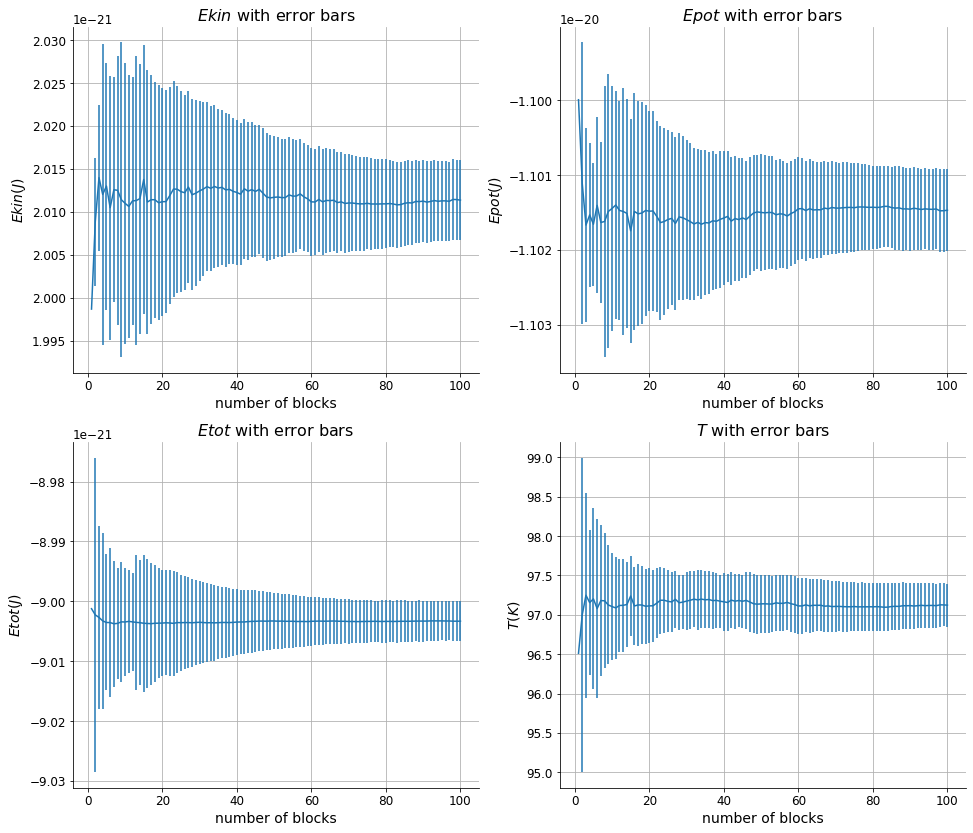

In [3]:
fig, ax = plt.subplots(2, 2, figsize=(16, 14))
nblk = 100

epsilon = 120*1.380649e-23 

x = np.zeros((4,nblk))
f = np.zeros((4,nblk))
error = np.zeros((4,nblk))
prop = ["kin","pot","tot","temp"]
rescale = [epsilon, epsilon, epsilon, 120]

for i in range(4):
    if(i<3): x[i,:], f[i,:], error[i,:] = np.loadtxt(f"ave_e{prop[i]}.out", usecols=(0,2,3), unpack='true')
    else: x[i,:], f[i,:], error[i,:] = np.loadtxt(f"ave_{prop[i]}.out", usecols=(0,2,3), unpack='true')


for i in range(4):
    if(i<2): axx = ax[0,i] 
    else: axx = ax[1,i-2]
    axx.errorbar(x[i,:],f[i,:]*rescale[i],yerr=error[i,:]*rescale[i])
    axx.set_xlabel(r"number of blocks")
    axx.grid(True)
    if(i < 3): 
        axx.set_ylabel(f"$E {prop[i]}  (J)$")
        axx.set_title(f"$E {prop[i]}$ with error bars")
    else:
        axx.set_ylabel(f"$T (K)$")
        axx.set_title(f"$T$ with error bars")